## Disclaimer

I'm planning this tutorial to be fun and intuitive. No jargon will be entertained / practiced without prior and proper introduction. This is going to be as **`local`** as [`Angamaly Diaries`](http://www.imdb.com/title/tt6167894/) in that aspect. But I think it would be up-and-coming if the reader has basic knowledge in TensorFlow, some math and basic orchestration of a Machine Learning experiment . Added, optimization techniques are explained only in an intuitive level since the detailed information could stretch the scope of this tutorial too much. 

## Shameless plug but helpful

Check out my basic tutorial on TensorFlow [here](https://github.com/sleebapaul/hello_tensorflow/blob/master/hello_tensorflow.ipynb) if you're not familiar with it.

## Introduction

In this tutorial, we'll try to understand Regression, specifically Linear Regression. Later, we'll solve an interesting problem using Regression with TensorFlow. Ultimately that's the point of learning, ain't it? Solving problems. 

We'll start the tutorial with some high school math. 

Consider the function $$y = x$$. 

We can write $y$ as $f(x)$ since $y$ is defined on $x$, right? So, $$f(x) = x$$

What would be the value $f(x)$ for a particular $x$ ? Consider the following table and have a keen look on the values. I've put 10 data points of the function $f(x)$ in this table. 

| x 	| f(x) 	|
|----	|------	|
| 1 	| 1 	|
| 0 	| 0 	|
| 3 	| 3 	|
| 10 	| 10 	|
| -1 	| -1 	|
| -8 	| 8 	|
| 6 	| 6 	|
| -2 	| -2 	|
| 9 	| 9 	|

How this function would look like? Let's plot it right?  

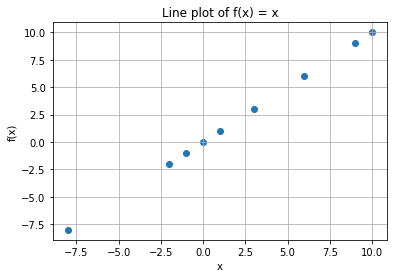

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 0, 3, 10, -1, -8, 6, -2, 9]) # defined x as a numpy array of the table values
y = x # y = f(x) = x

plt.scatter(x, y) # let's plot the graph

plt.xlabel('x') # xlabel
plt.ylabel('f(x)')# y label
plt.title('Line plot of f(x) = x') # title of plot
plt.grid(True) # grid on plot surface
plt.show()

```
"Aha ! cool. Easy hit. Now let's do the reverse, shall we? "
"What do you mean by reverse? We've a function. We plotted it. End of the story."
"No. This is the starting of our story :D . Primarily,  let me elaborate what I meant by reverse." . 
```

Here we've the function $f(x) = x$, with that we calculated the data points i.e. $y$ values for each $x$. We even plotted it. Now, imagine what if we don't know what the function is. All we have is some data points. Can we calculate the function/relationship from those data points? That's what **reverse** means. 

```
"How can we do THAT ? :/"
"Haha ! That is called Curve Fitting."
"Wait, we've started with Regression and now you're talking about Curve fitting. Are you okay, Sleeba?"
"Yeah, I'm. Read on :D"
```

## Curve Fitting 

[Curve fitting](https://en.wikipedia.org/wiki/Curve_fitting) is the process of constructing a curve, or a mathematical function, that has the **best fit** to a series of data points, possibly subject to constraints. 

Fancy definition right? Terms like best fit, subjects to constraints, blah blah blah ... :D Don't think about any of it right now. Let's see what's the exact problem we are addressing here. Consider the table again. 

| x 	| f(x) 	|
|----	|------	|
| 1 	| 1 	|
| 0 	| 0 	|
| 3 	| 3 	|
| 10 	| 10 	|
| -1 	| -1 	|
| -8 	| 8 	|
| 6 	| 6 	|
| -2 	| -2 	|
| 9 	| 9 	|


All we know is these data points. Say, when $x$ = 1, $f(x)$ would be 1 or when $x$ = -1 then $f(x)$ would be -1. 

What we need to understand from these points is a relationship between $x$ and $f(x)$. Fortunately, we don't have any clue about that relationship. 

```
"No, we know that it's a straight line."   
"How do we know that?"  
"Because we generated data points for f(x) = x and plotted it as a straight line just now :P :D"  
"Not that easy, girl! What about this?? :D"  
```

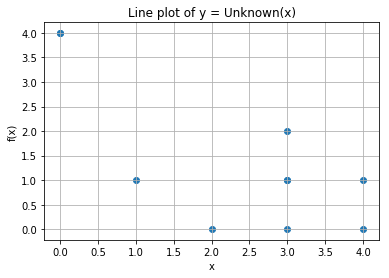

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
x = np.random.randint(5, size=10) # defined x as a numpy array of the table values
y = np.random.randint(5, size=10) # 

plt.scatter(x, y) # let's plot the graph

plt.xlabel('x') # xlabel
plt.ylabel('f(x)')# y label
plt.title('Line plot of y = Unknown(x)') # title of plot
plt.grid(True) # grid on plot surface
plt.show()

## Nuts and Bolts of Curve Fitting

We need to construct a relationship between $x$ and $y$ using the data points available for us. It could be a linear relationship, maybe an exponential growth or a highly unpredictable random distribution. So how do we start ? 

There is a systematic procedure for curve fitting. 

---------------------------
### I.  Plot the data points
    - This will help us to understand the basic relationship between the variables

Eg. Consider the distribution below

![title](images/linear_scatter_plot.png)


What would be the relationship?
1. Exponential
2. Linear growth
3. Linear decay
4. Polynomial 

Clearly it is a linear relationship and it a growth.  
What about this ?  

![title](images/rsz_exp_decay.png)

Linearly decaying ? Or exponentially decaying? Well we'll settle on decaying :D   

This is an issue. So we should accept the fact that we can't always understand the underlying relationships between variables just by plotting the scatter plot. These are 2-D plots or maybe even we can manage 3-D, but definitely not, say, a 10-D plot.

-----------------------------
### II. We'll assume a relationship for variables to start with.  
    - The relationship could be Linear or Exponential or Polynomial or it could be anything.  
    
Now this is confusing. How that works? We don't know the relationship between the variables, how can we just "ASSUME" something? 

Before answering that question we need to know about two curve fitting paradigms. 

**Types of Curve Fitting**

1. [Interpolation](https://en.wikipedia.org/wiki/Interpolation)
2. Regression  

```
"WOO-HOO! Regression came to picture. Now dots are connecting. "
"I told you :D"
```

Interpolation and Regression are differed by the problem they solve. See the picture below.  

![title](images/inter_regress.png)

**The Difference**

As we see in the picture, both of the curves fit the same set of data points. But there is a difference in the way they are fitted. The left is Interpolation and other is Regression. Now think about the difference. 

In Interpolation, we make sure that each data point is perfectly fitted in the curve we're fitting. In constrast, Regession model is not strict about each point fitting the curve, rather we focus on the **trend** of the entire range of data.  

You may ask if it is an approximation. Of course, Regression is approximation, but it is a benefitting approximation.  
```
"I need more explanation :("
"Okay :)"
```

See, if you look deep enough, you can interpret that, Interpolation is more concerned about relationships between immediate data points, not with the entire data. Concurrently, Regression showcase main tendencies in the complete data set. 

How this subtle difference matters in a real life problem? 

A good example for why you might want to approximate instead of interpolate are prices on stock market. 

Say, you can take stoke prices of Apple from 1991 to 2017, and try to interpolate them to get some prediction of the price in 2018. This is rather a bad idea, because there is no reason to think that the relations between the prices can be exactly expressed by a polynomial. But linear regression might do the trick as the linear function might be a good approximation.  

Between, the curve we fit using Regression is also called Regression line (JARGON ALERT :P)

Back to our initial question, how we can just ASSUME a relationship to an unknown set of data points given to us? 

Here, we should understand the intention of our assumption. We're not investigating the exact curve on which all the data points would fit into. Rather, we are trying to understand the behaviour of the data. Maybe, the data is exponential and we assumed a linear relationship. But with that assumption, we're actually trying to derive the best fitted straight line or in other words, the best linear approximation with which the data can be described. 

Readers who are familiar with Machine Learning can relate [overfitting](https://en.wikipedia.org/wiki/Overfitting) with interpolation. 

Now keep calm and listen to Morpheus :P

![title](images/meme.jpg)

### III. Finding the best fit

From starting onwards we are hearing this term `best fit`. What do we mean by a best fit? Consider the literal meaning of `best fit` and make a guess on following pictures.  

![title](images/best_fit.png)

What would be best fit for the data?

```
A, B or C ?
"I think it is A. 
```
Intuition of best fit is that, the best fitted curve would be most adequate assumed approximation for the input data points according to a metric.

```
Metric? Why do we need a metric? It's easy. We can get it from just seeing it."
"Really! then try this? ;)"
```

![title](images/best_fit_2.png)

```
"Now temme? A, B or C? :P"
"Meh. You got me this time :/"
```
So how do we calculate the best fit for distributions like above? Just seeing the fitted curve won't help on complex distributions. What would be that metric to measure adequacy of fitness? Don't worry, we've a systematic procedure to find the best fitting curve. 

1. Assume the relationship and initialize it's coefficients.
2. Defining a cost function to measure the fitness.
2. Find the optimum coefficients which minimize value of that cost iteratively. 

```
Coefficients, Cost, Relationship ... What the hell ?? !!!
Don't panic kiddo. We're on right path :D
```

From here onwards, we'll converge to Single Variable/Invariate Linear Regression to explain the procedures. The procedures are same for any kind of Regression, but variations will be on assumed functions, cost and optimization. You may find a variety of Regression models [here.](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)  

---------------------------------

## Linear Regression

Let me serve you some jargon delicacy for starters :D  

Linear Regression establishes a relationship between dependent variable ($y$) and one or more independent variables ($x$) using a best fit straight line.  

Aha! Now our $x$ and $y$ have cool names. Why they've such names? Its quite self explanatory.

Consider our old data points again.

| x 	| y 	|
|----	|------	|
| 1 	| 1 	|
| 0 	| 0 	|
| 3 	| 3 	|
| 10 	| 10 	|
| -1 	| -1 	|
| -8 	| 8 	|
| 6 	| 6 	|
| -2 	| -2 	|
| 9 	| 9 	|

$x$ can take any values for it as we see in the table. It is independent of any restrictions. But $y$ can take values depending upon its relatioship with $x$. So $y$ is dependent. Simple :)

**Assumed function**

In Linear Regression, as Morpheus tells us, the curve we fit is a straight line and it is described as,

$$y = ax + b$$

Our assumed function has a funny name called Hypothesis function. Hypothesis of linear regression is a straight line. Then, coefficients of our hypothesis function would be,

- $a$ = Slope of the line
- $b$ = Y Intercept of the line

The goal is to find the optimum values of $a$ and $b$, so that it will give us the best fit for the data. To find this optimum values, we need a metric to measure the quality of fit. And that metric is called a [cost function.](https://en.wikipedia.org/wiki/Loss_function). 

**Cost Function**

We define a cost function to measure the fitness quality of the curve we fit each time. The best fit should be obviously at minimum cost. Now think about it logically. What would be a good cost function ?  

I think it is the error between what we expect and what the assumption give us. Confused ? We'll start with error at each point. Consider the error proposed below. What do you think about it's credibility?

$$Error\ =\ True\ value\ of\ Y\ -\ Assumed\ value\ of\ Y$$

Let me explain this step by step with the above data.

Say we initialized the curve as $$y = 2x + 1$$

Now, for $x = 1$, from the table, $y\_true = 1$. What would be predicted  value for y with the assumed function? $$y\_pred = 2 * 1 + 1 = 3$$

Then error at $x = 1$ would be 
$$error\ =\ y\_true\ -\ y\_assumed$$
$$=\ 1\ -\ 3\ =\ -2$$

Similarly for each points in the data points, there will an error associated with it as shown in the figure below. If we can reduce this error at each points, that means the difference between $y\_true$ and $y\_pred$ is reduced. That results in a line which is most adequate to fit that data point. Simple, right? 

![title](images/error_linear_regression.png)

Now we'll scale it to the entire dataset. What would be average error considering say, $m$ data points? 

$$Average\ Error,\ E\ =\ \frac{1}{m}\sum_{i=1}^{m} y\_true^{(i)}\ -\ y\_pred^{(i)}$$
$$\ =\ \frac{1}{m}\sum_{i=1}^{m} y\_true^{(i)}\ -(\ ax^{(i)}\ +\ b)$$
where $i$ represent each data points. 

Though, considering the explanations yet, this is intuitive and expected cost function, it has a practical problem. The negative and positive errors will cancel out while averaging the entire dataset, results in net error to zero. So we'll consider tweaking it to another form called [Mean Squared Error.](https://en.wikipedia.org/wiki/Mean_squared_error)

The cost function becomes, $$Cost\ =\ \frac{1}{m}\sum_{i=1}^{m} (y\_true^{(i)}\ -\ y\_pred^{(i)})^{2} $$

Now, even the error is negative, it won't cancel out with positive errors as we square the difference. Now comes the procedure finding minimum value of this cost and coefficients $a_{opt}$ and $b_{opt}$ corresponding to that minimum cost. Then our best fit would be,
$$y\ =\ a_{opt}\ *\ x\ +\ b_{opt}$$


## Vectorization

You all have studied linear algebra in high school. We are going to apply a bit of it on the above cost function.

```
Why? What is wrong now?
Well, it's all about arrangement of convenience baby ;)
```

What is the arrangement of convenience here? Let me explain. 

$$ 5\ *\ 3\ =\ 15$$   
$$2\ *\ 4\ =\ 8$$  
$$7\ *\ 1\ =\ 7$$

Now I'm representing it as something you're familiar. 

$$
\begin{bmatrix}
5\\ 
2\\ 
7
\end{bmatrix}
*
\begin{bmatrix}
3\\ 
4\\ 
1
\end{bmatrix}
=
\begin{bmatrix}
15\\ 
8\\ 
7
\end{bmatrix}
$$


Yes, element wise matrix multiplication. Let's try something more interesting ;) Consider the below table. 


| x 	| y 	|
|----	|------	|
| 5 	| 3 	|
| 2 	| 4 	|
| 7 	| 1 	|



We want to compute $$\sum_{i=1}^{3} x^{(i)}\ *\ y^{(i)}$$

What would be the matrix replica? ;) 

$$
\begin{bmatrix}
5 & 2 & 7
\end{bmatrix}
*
\begin{bmatrix}
3\\
4\\
1
\end{bmatrix}
=
\begin{bmatrix}
30
\end{bmatrix}
$$

Exactly, our little matrix multiplication. :D Now, how we are going to represent our cost function as matrix? 

Say we have $m$ data points, then we will define parameters for entire dataset as follows. 


$$ X = 
\begin{bmatrix}
x^{(1)}\\
.\\
.\\
.\\
x^{(m)}
\end{bmatrix}
$$


$$ Y_{true} = Y = 
\begin{bmatrix}
y^{(1)}\\
.\\
.\\
.\\
y^{(m)}
\end{bmatrix}
$$


$$cost\ =\ \frac{1}{m} \sum_{1}^{m}[Y - (a\ *\ X+b)]$$

```
This equation is looking the similar as our previous cost equation.
Yes, it does.
Then what is the point? 
Good question :) 
```

I'll explain one advantage of vectorization quickly and list the others below. 

Consider the cost function of Multi Variable Linear Regression. You don't need to worry about the fancy jargon. Multi Variable Linear regression has more than one independent variables unlike our little sweet Single Variable Linear Regression.   

$$Cost\ =\ \frac{1}{m}\sum_{i=1}^{m} \sum_{j=1}^{n} (\ y_{true}\ -\ y_{pred})^{2}$$

Here we have an additional sum to iterate through $(j)$, the various features / independent variables. A sum requires a `for loop`. So we need two `for loops` here. But using vectorization we can reduce the inner iteration through features. Dig deeper [here.](https://www.youtube.com/watch?v=iln_R5iJ1ts)

Other reasons for vectorization are, 

* Almost all numerical computation libraries has n dimensional arrays basic data structures, thus implementation is easy.
* Matrix operations are faster than element wise computation.
* They can be parallelize to some extent to exploit multiple cpu's.

------------------------------

## Optimization techniques

But you still don't know how `minimization of cost` works, do you? ;)

Optimization techniques is, itself worth a few tutorials :D So, I would like to give you an intuition about what is going to happen at this level of Linear Regression and move on. References for learning them deeply will be added at the end of this section. 

Okay. An optimization techique is procedure of selecting the best element (with regard to some criterion) from some set of available alternatives. It is like choosing the best onion from a pile of onions (Ask your mother. She knows :D). 

Mathematically speaking, an optimization algorithm finds the minimum or maximum of a function. In our case we need to minimize the cost function. Consider the following picture. A boy is blindfolded and he's standing at the top of a mountain. He needs to reach the lake at the valley. What would be his path of travel? The initial position of boy is our initial parameter values. As the optimization progress, the boy moves downhill towards the lake, the [GLOBAL MINIMA](https://en.wikipedia.org/wiki/Maxima_and_minima)  and hopefully reach the destination. The global minimum point gives us $a_{opt}$ and $b_{opt}$. 

![title](images/grad_desc.png)

The boy can't reach the valley in a single step, unless he had a slip :D. Likewise, none of the optimization techniques can reach the GLOBAL MINIMA in a single leap. There is a term called learning rate, which decides how big the step, the algorithm takes downhill at once, towards valley. We need to iterate over the different values of parameters and will eventually settle down with the most desirable value among them. Well, optimization techniques are one way of doing this process of finding minimum or maximum of a function. There are analytical ways to compute the optimum coefficients, which don't need iterations. Then why we use the messy way? Read about it yourself :) 

**Skelton of any optimization technique**

1. Stopping_criteria = epsilon
    - Eg. $\epsilon\ =\ 10^{-7}$
2. Initialize coefficients
    - Mostly, it'll be a random intialization
    - In our case $a$ and $b$
3. Calculate cost function with current coefficients
    - In our case, $Cost1\ =\ \frac{1}{m}\sum_{i=1}^{m} (y\_true^{(i)}\ -\ (\ ax^{(i)}\ +\ b))^{2} $
4. Update the coeffients by minimizing or maximizing the cost function
    - We'll be using an algorithm called [Gradient Descent](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/) in our coding section.
    - We've, say, updated variables $a\_new$ and $b\_new$ after minimizing the cost.
5. Calculate new cost using new coefficients
    - $Cost2\ =\ \frac{1}{m}\sum_{i=1}^{m} (y\_true^{(i)}\ -\ (\ a\_new\ *\ x^{(i)}\ +\ b\_new))^{2} $
6. If (Cost2 - Cost1) < epsilon, stop the process; else go to step 3
    - We can stop the iteration by setting a definite number of iterations too
    
After each iteration, the cost will be reduced and coefficients will be more refined. If not, let me tell you mate, you're in trouble. :D One entire iteration through the data is called an epoch. 

### Sorry, but...

1. For a novice to optimization techniques, this whole setup would look sloppy. You people would not be able to connect the dots completely :D I understand that pain since I've gone through it once. But that's completely fine. You need an intuition about what is going to happen and that's what I've provided above. Jump into the coding session and understand the implementation of the optimization algorithm. Thanks to #TensorFlow, it is just one line of code. 

2. Optimization techniques to a machine learning algorithm is engine to a car. As things progress, I highly recommend you to find some time for understanding them in greater detail. Some resources are added below in favor of that.

1. [Keep it simple! How to understand Gradient Descent algorithm](https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html)
2. [Gradient Descent For Machine Learning](https://machinelearningmastery.com/gradient-descent-for-machine-learning/)
3. [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
4. [Introduction to Gradient Descent Algorithm (along with variants) in Machine Learning](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/)
-----------------------------
## Prediction 

Once we have an optimum model, we can make predictions on new values of independent variables. 

Back to our stock example, you can take stoke prices of Apple from 1991 to 2017, and try to predict prediction of the price in 2018. To learn our $a\_opt$ and $b\_opt$, we can use the data points from 1991 and 2017. Once it is found, 

$$y\_pred\_2018\ =\ a\_opt\ *\ x\_2018\ +\ b\_opt$$  

You won't be getting an idea of this part until you see it on a real problem. We'll demonstrate it in our coding session and trust me this is the fruit of all these pain we've been going through :D

Now, learning the $a\_opt$ and $b\_opt$ from examples is called "training" phase and predicting for a new example using learned parameters is called "testing". For every Machine Learning in the universe, we've these two phases. 

## Final thoughts

So that's it. The theory part of Linear Regression is over. We'll code all these blah blah blahs using TensorFlow to solve an interesting real life problem. So see you at coding [notebook.]() 

Here, implicitly I've surfaced most of the terms and procedures you would find in an ML experiment. Thus you may find it useful, if you're a novice to ML. 

Happy Learning !